# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_eth=5.3
my_btc=1.2

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [19]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response_data = requests.get(btc_url).json()
#print(btc_response_data)
btc_price = btc_response_data["data"]["1"]["quotes"]["USD"]["price"]
print (btc_price)
my_btc_value = btc_price * my_btc
print (my_btc_value)


# Fetch current ETH price
# YOUR CODE HERE!]
eth_response_data = requests.get(eth_url).json()
#print(eth_response_data)
eth_price = eth_response_data["data"]["1027"]["quotes"]["USD"]["price"]
print (eth_price)
my_eth_value = eth_price * my_eth
print (my_eth_value)
# Compute current value of my crpto
# YOUR CODE HERE!
my_crypto_value = my_btc_value + my_eth_value
print (my_crypto_value)
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

54863.0
65835.59999999999
2401.08
12725.723999999998
78561.324
The current value of your 1.2 BTC is $65835.60
The current value of your 5.3 ETH is $12725.72


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [20]:
# Current amount of shares
# YOUR CODE HERE!
my_agg=200
my_spy=50

In [21]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [22]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-04-09", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-04-09 00:00:00-04:00  114.11  114.33  114.035  114.18  5293317  408.39   

                                                              
                             high     low    close    volume  
time                                                          
2021-04-09 00:00:00-04:00  411.67  408.26  411.435  52236800

In [23]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.18
Current SPY closing price: $411.435


In [24]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20571.75
The current value of your 200 AGG shares is $22836.00


### Savings Health Analysis

In [25]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 1200
total_shares = my_spy_value + my_agg_value
my_crypto_value
# Create savings DataFrame
# YOUR CODE HERE!
# Set current amount of shares data
savings_data = {
    "amount": [my_crypto_value, total_shares]
}

# Set the tickers
tickers = ["crypto", "shares"]

# Create the shares DataFrame
df_savings = pd.DataFrame(savings_data, index=tickers)

# Display savings DataFrame
display(df_savings)

,amount
crypto,78561.324
shares,43407.750


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

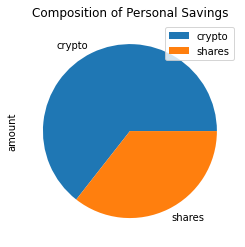

In [26]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [38]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_shares + my_crypto_value
print(total_savings)

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations!  You have saved enough money in this fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached this financial goal.")
elif total_savings< emergency_fund:
    savings_lack = emergency_fund-total_savings
    print(f"You are {savings_lack} away from reaching the goal.")

121969.074
Congratulations!  You have saved enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [42]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-04-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-09', tz='America/New_York').isoformat()

In [43]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end =end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-04-19 00:00:00-04:00  109.47  109.5600  109.39  109.470  1986888.0   
2017-04-20 00:00:00-04:00  109.31  109.4000  109.20  109.300  1738089.0   
2017-04-21 00:00:00-04:00  109.40  109.4899  109.30  109.330  1388470.0   
2017-04-24 00:00:00-04:00  109.05  109.2200  109.00  109.170  1945439.0   
2017-04-25 00:00:00-04:00  108.99  109.0450  108.77  108.805  1717302.0   

                              SPY                                       
                             open     high     low   close      volume  
time                                                                    
2017-04-19 00:00:00-04:00     NaN      NaN     NaN     NaN         NaN  
2017-04-20 00:00:00-04:00  234.15  235.845  233.78  235.30  65462557.0  
2017-04-21 00:00:00-04:00  235.25  235.310  234.13  234.59  54056385.0  
2017-04-24 00:00:00-04:00  237.18  237.410  236.61  237.12  72965789.0  
2017-04-25 00:00:00-04:00  237.91  238.950  237.81  238.53  55736881.0

In [46]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [49]:
# Printing the simulation input data
# YOUR CODE HERE!
type(MC_fiveyear.portfolio_data)

pandas.core.frame.DataFrame

In [51]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.portfolio_data.head()

AGG                                        \
                             open      high     low    close     volume   
time                                                                      
2017-04-19 00:00:00-04:00  109.47  109.5600  109.39  109.470  1986888.0   
2017-04-20 00:00:00-04:00  109.31  109.4000  109.20  109.300  1738089.0   
2017-04-21 00:00:00-04:00  109.40  109.4899  109.30  109.330  1388470.0   
2017-04-24 00:00:00-04:00  109.05  109.2200  109.00  109.170  1945439.0   
2017-04-25 00:00:00-04:00  108.99  109.0450  108.77  108.805  1717302.0   

                                           SPY                           \
                          daily_return    open     high     low   close   
time                                                                      
2017-04-19 00:00:00-04:00          NaN     NaN      NaN     NaN     NaN   
2017-04-20 00:00:00-04:00    -0.001553  234.15  235.845  233.78  235.30   
2017-04-21 00:00:00-04:00     0.000274  235.25  235.310  234.13  234.59   
2017-04-24 00:00:00-04:00    -0.001463  237.18  237.410  236.61  237.12   
2017-04-25 00:00:00-04:00    -0.003343  237.91  238.950  237.81  238.53   

                                                    
                               volume daily_return  
time                                                
2017-04-19 00:00:00-04:00         NaN          NaN  
2017-04-20 00:00:00-04:00  65462557.0          NaN  
2017-04-21 00:00:00-04:00  54056385.0    -0.003017  
2017-04-24 00:00:00-04:00  72965789.0     0.010785  
2017-04-25 00:00:00-04:00  55736881.0     0.005946

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

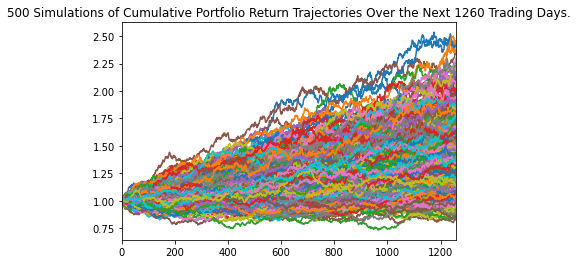

In [52]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_fiveyear.plot_simulation()

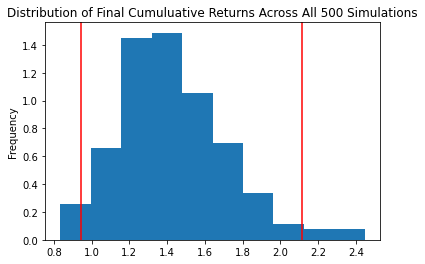

In [54]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_fiveyear.plot_distribution()



### Retirement Analysis

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl= MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean              1.428763
std               0.284759
min               0.834320
25%               1.238119
50%               1.391214
75%               1.591084
max               2.447381
95% CI Lower      0.944337
95% CI Upper      2.116863
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [56]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $18886.74 and $42337.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [57]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28330.11 and $63505.9


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [58]:
####I opt-out!!


# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [59]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [60]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [61]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [63]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [65]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [66]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [67]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [69]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

NameError: name 'ci_lower_ten' is not defined